In [1]:
import pandas as pd
import tensorflow as tf
from Analyser import Analyser

In [2]:
help(Analyser)

Help on class Analyser in module Analyser:

class Analyser(builtins.object)
 |  Analyser(dataframe: pandas.core.frame.DataFrame, features: list, target: str)
 |  
 |  Creates an analysing tool for pandas dataframes.
 |  Provide the dataset in the form of a dataframe, 
 |  feature names as a list and target name to use.
 |  The tool is an easy way to create basic neural
 |  networks of different depths and sizes.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dataframe: pandas.core.frame.DataFrame, features: list, target: str)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  create_model(self, hNum: int, max_depth=4, two_way=False, activation='relu', softmax=False)
 |      hNum - number of neurons on the biggest hidden layer
 |      max_depth - max number of hidden layers
 |      two_way - if set to True layers are built as follows: first layer is twice the size of 
 |             the number of features and every following layer is double that 
 | 

In [3]:
migrene_df = pd.read_csv('migrene_data.csv')
migrene_df

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,Basilar-type aura
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,Basilar-type aura
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,Basilar-type aura
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,Basilar-type aura


In [4]:
features = list(migrene_df.columns)
features.remove('Type')

In [5]:
migrene_analyser = Analyser(migrene_df, features=features, target = 'Type')

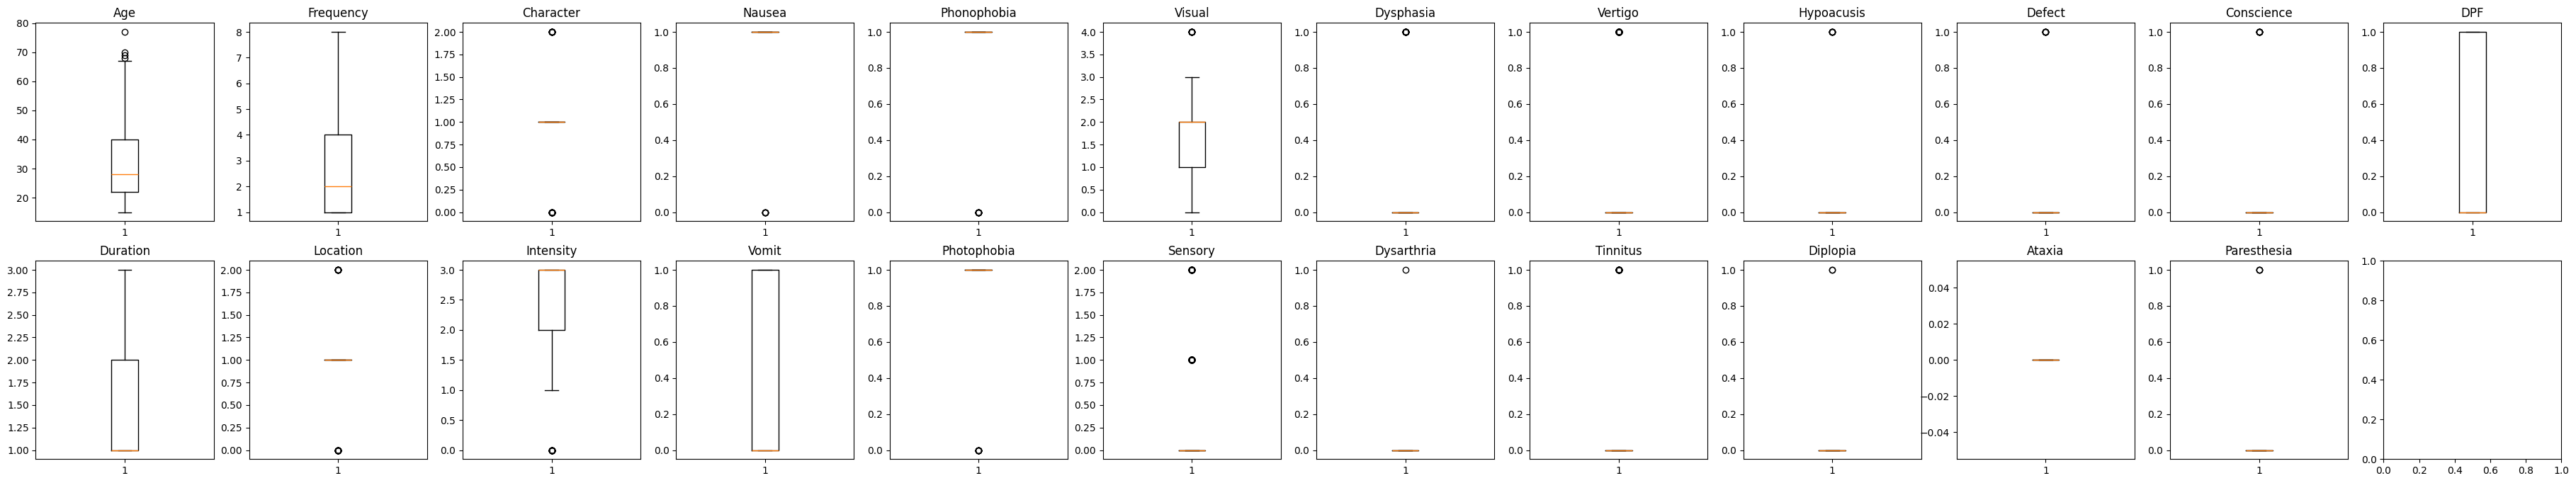

In [6]:
migrene_analyser.show_boxplots()

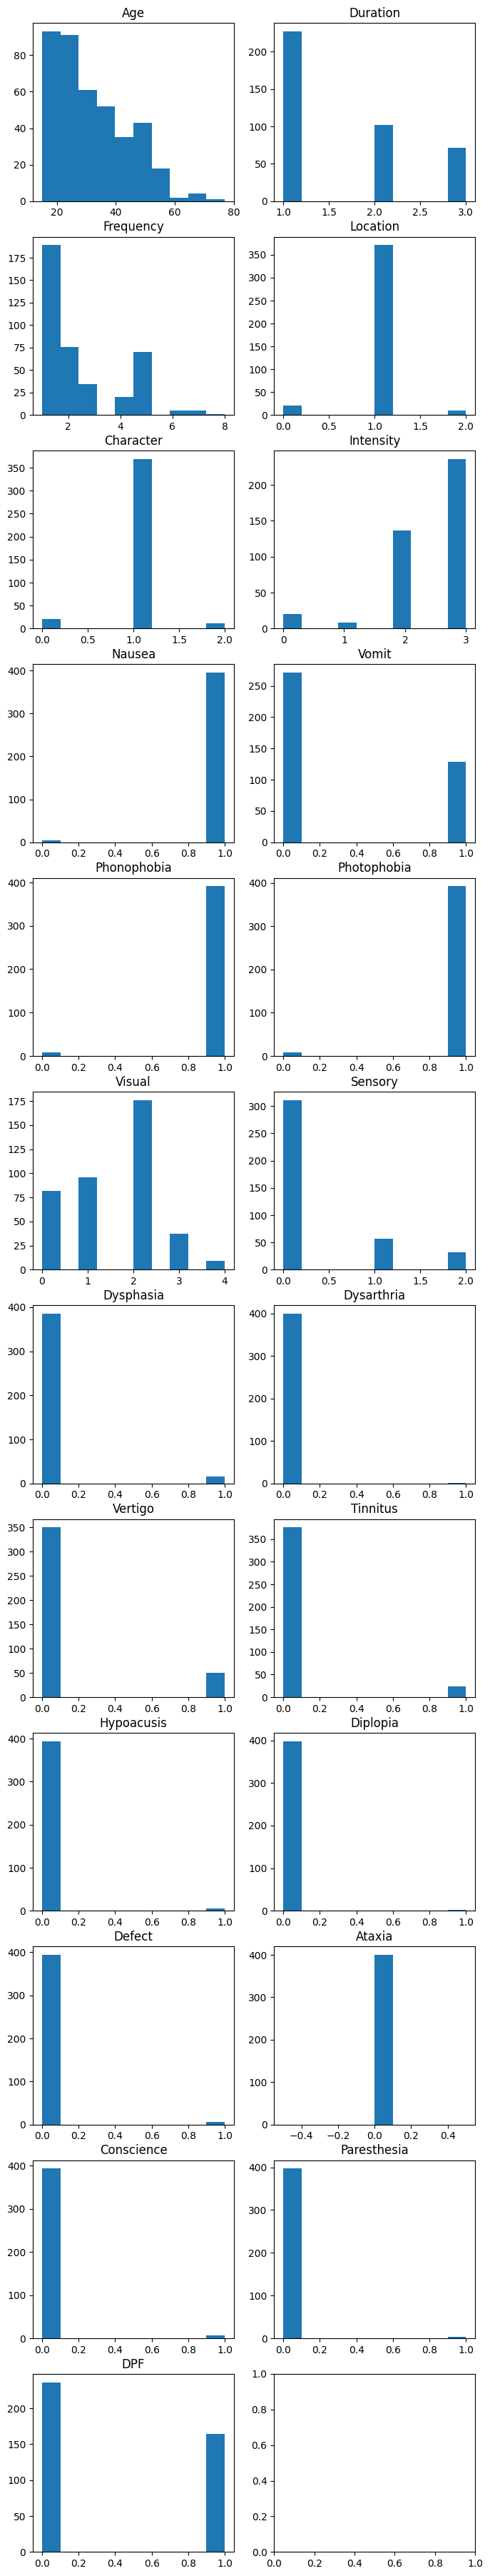

In [7]:
migrene_analyser.show_histograms()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1200      
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 target (Dense)              (None, 7)                 182       
                                                                 
Total params: 2657 (10.38 KB)
Trainable params: 2657 (10.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model.
History saved to self.results.
3/3 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         4
           1       0.25      0.25      0.25         4
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.84      1.00      0.91        57
           6       1.00      1.00      1.00         2

    accuracy                           0.78        80
   macro avg       0.35      0.39      0.37        80
weighted avg       0.65      0.78      0.71        80



c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

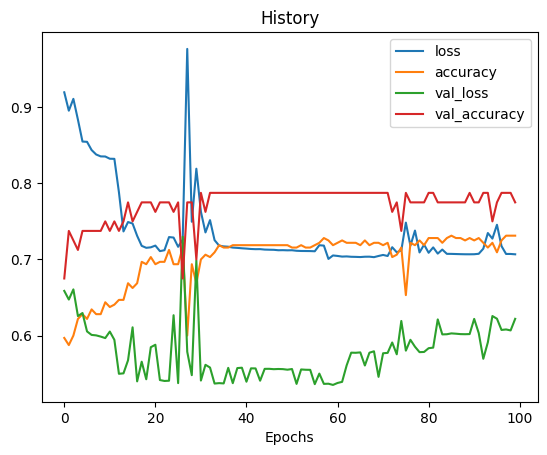

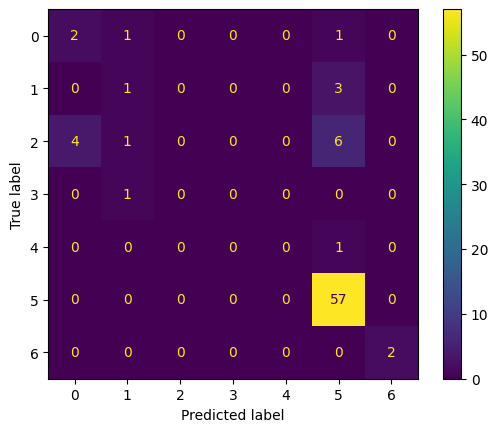

In [8]:
migrene_analyser.create_model(50)
migrene_analyser.train_model(100)
migrene_analyser.show_history()
migrene_analyser.show_results()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                1200      
                                                                 
 dense_3 (Dense)             (None, 25)                1275      
                                                                 
 target (Dense)              (None, 7)                 182       
                                                                 
 softmax (Softmax)           (None, 7)                 0         
                                                                 
Total params: 2657 (10.38 KB)
Trainable params: 2657 (10.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model.
History saved to self.results.
3/3 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.20      0.75      0.32         4
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        11
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.87      0.95      0.91        57
           6       1.00      1.00      1.00         2

    accuracy                           0.75        80
   macro avg       0.44      0.53      0.46        80
weighted avg       0.67      0.75      0.70        80



c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

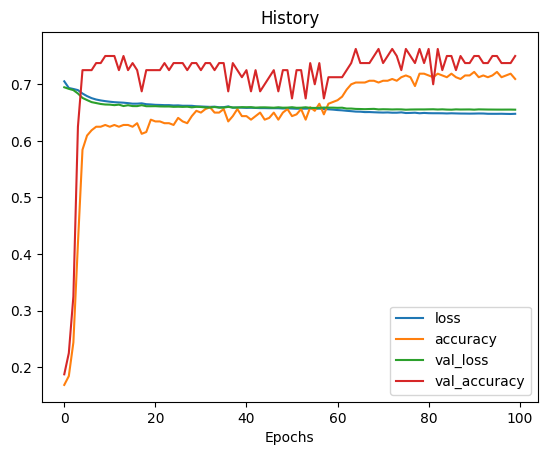

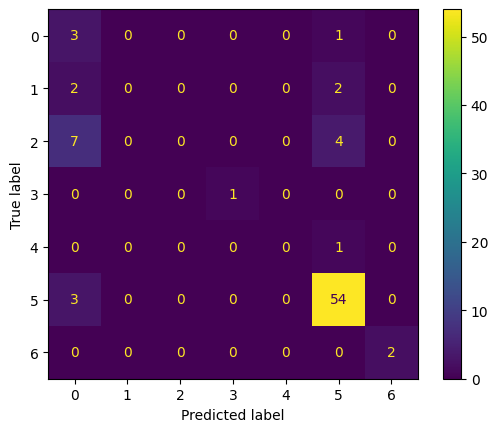

In [9]:
migrene_analyser.create_model(50, softmax=True)
migrene_analyser.train_model(100)
migrene_analyser.show_history()
migrene_analyser.show_results()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                1200      
                                                                 
 dense_5 (Dense)             (None, 25)                1275      
                                                                 
 target (Dense)              (None, 7)                 182       
                                                                 
Total params: 2657 (10.38 KB)
Trainable params: 2657 (10.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model.
History saved to self.results.
3/3 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      0.25      0.33         4
           2       1.00      0.91      0.95        11
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.90      1.00      0.95        57
           6       1.00      1.00      1.00         2

    accuracy                           0.91        80
   macro avg       0.77      0.67      0.70        80
weighted avg       0.89      0.91      0.90        80



c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

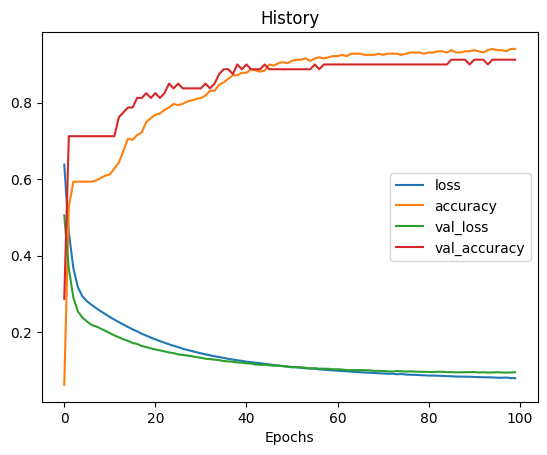

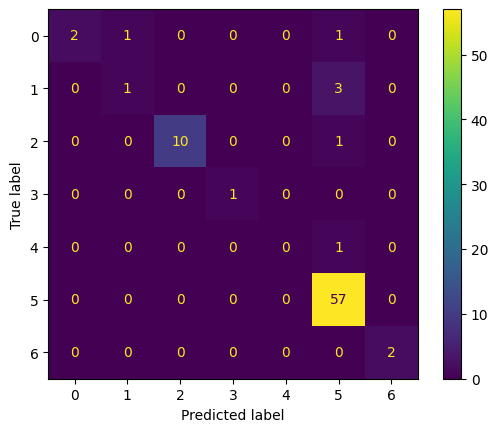

In [10]:
migrene_analyser.create_model(50, activation='sigmoid')
migrene_analyser.train_model(100)
migrene_analyser.show_history()
migrene_analyser.show_results()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                1200      
                                                                 
 dense_7 (Dense)             (None, 25)                1275      
                                                                 
 target (Dense)              (None, 7)                 182       
                                                                 
Total params: 2657 (10.38 KB)
Trainable params: 2657 (10.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model with callbacks.

Epoch 34: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 37: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 40: ReduceLROnPlateau reducing learning rate to 1e-05.
Restoring model weights from the end of the best epoch: 31.
Epoch 41: early stopping
INFO:tensorflow:Assets written to: migrene_50\assets


INFO:tensorflow:Assets written to: migrene_50\assets


Best model saved to migrene_50. History saved to self.results.
3/3 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      0.25      0.33         4
           2       1.00      0.55      0.71        11
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.84      1.00      0.91        57
           6       1.00      1.00      1.00         2

    accuracy                           0.85        80
   macro avg       0.62      0.47      0.52        80
weighted avg       0.83      0.85      0.82        80



c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

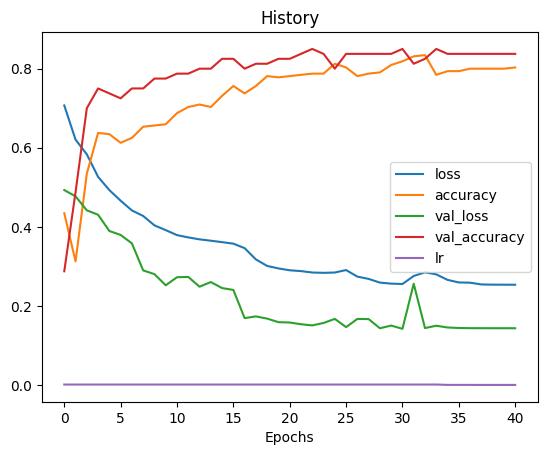

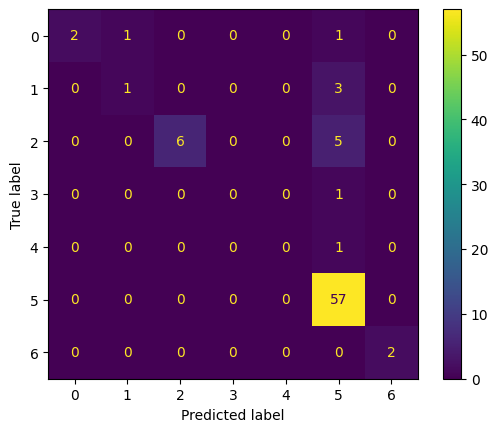

In [11]:
migrene_analyser.create_model(50)
migrene_analyser.train_model(500, are_callbacks=True, save = True, save_file='migrene_50')
migrene_analyser.show_history()
migrene_analyser.show_results()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_0 (Dense)      (None, 46)                1104      
                                                                 
 hidden_layer_1 (Dense)      (None, 50)                2350      
                                                                 
 hidden_layer_2 (Dense)      (None, 25)                1275      
                                                                 
 target (Dense)              (None, 7)                 182       
                                                                 
Total params: 4911 (19.18 KB)
Trainable params: 4911 (19.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model with callbacks.

Epoch 54: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 57: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 60: ReduceLROnPlateau reducing learning rate to 1e-05.
Restoring model weights from the end of the best epoch: 51.
Epoch 61: early stopping
INFO:tensorflow:Assets written to: migrene_50_sigmoid\assets


INFO:tensorflow:Assets written to: migrene_50_sigmoid\assets


Best model saved to migrene_50_sigmoid. History saved to self.results.


3/3 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.67      0.50      0.57         4
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.93      1.00      0.97        57
           6       1.00      1.00      1.00         2

    accuracy                           0.94        80
   macro avg       0.80      0.71      0.74        80
weighted avg       0.92      0.94      0.93        80



c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

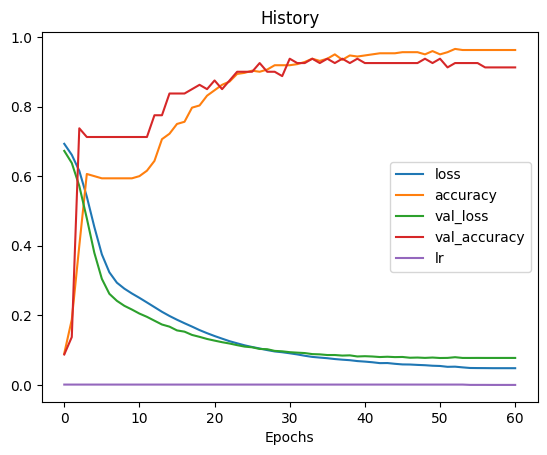

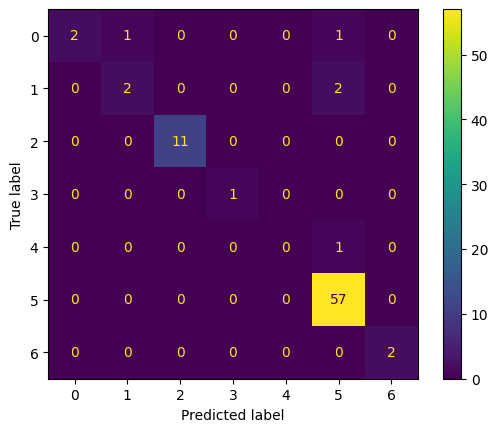

In [13]:
migrene_analyser.create_model(50, activation='sigmoid', two_way=True)
migrene_analyser.train_model(100, are_callbacks=True, save=True, save_file='migrene_50_sigmoid')
migrene_analyser.show_history()
migrene_analyser.show_results(load=True, load_path='migrene_50_sigmoid')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                1200      
                                                                 
 dense_9 (Dense)             (None, 25)                1275      
                                                                 
 target (Dense)              (None, 7)                 182       
                                                                 
Total params: 2657 (10.38 KB)
Trainable params: 2657 (10.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model with callbacks.

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.

Epoch 16: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.

Epoch 19: ReduceLROnPlateau reducing learning rate to 1e-05.
Restoring model weights from the end of the best epoch: 10.
Epoch 20: early stopping


3/3 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      0.25      0.33         4
           2       1.00      0.82      0.90        11
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.89      1.00      0.94        57
           6       1.00      1.00      1.00         2

    accuracy                           0.90        80
   macro avg       0.77      0.65      0.69        80
weighted avg       0.88      0.90      0.88        80



c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

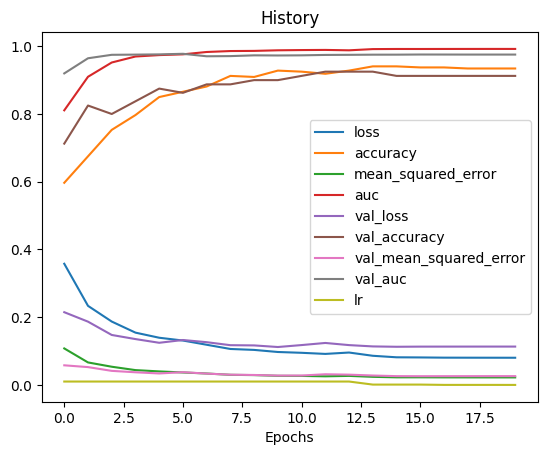

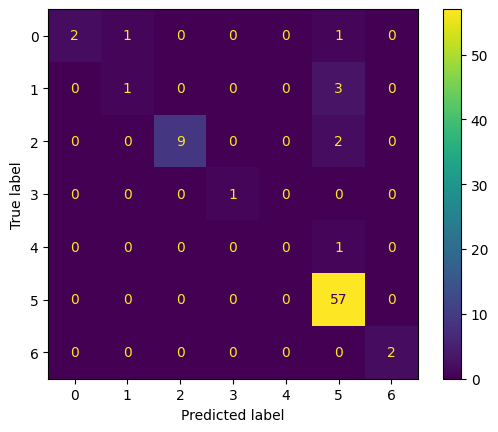

In [14]:

migrene_analyser.create_model(50, activation='sigmoid')
migrene_analyser.train_model(100, are_callbacks=True, 
                                metrics=[
                                    'accuracy',
                                    tf.keras.metrics.MeanSquaredError(),
                                    tf.keras.metrics.AUC()],
                                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
                            )
migrene_analyser.show_history()
migrene_analyser.show_results()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               3072      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 target (Dense)              (None, 7)                 231       
                                                                 
Total params: 13639 (53.28 KB)
Trainable params: 13639 (53.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model.
History saved to self.results.
3/3 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      0.25      0.33         4
           2       1.00      0.91      0.95        11
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.90      1.00      0.95        57
           6       1.00      1.00      1.00         2

    accuracy                           0.91        80
   macro avg       0.77      0.67      0.70        80
weighted avg       0.89      0.91      0.90        80



c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

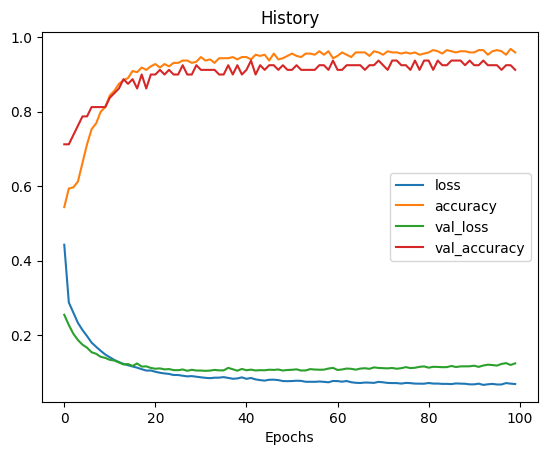

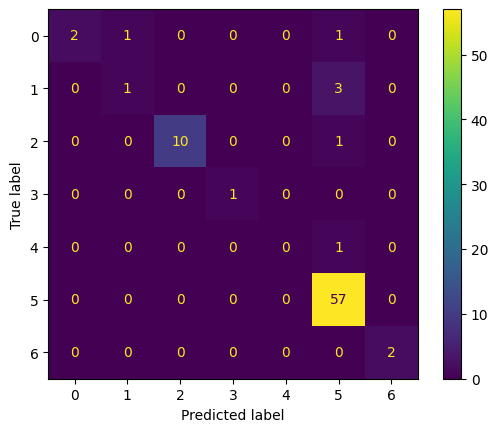

In [15]:
migrene_analyser.create_model(128, activation='softmax', max_depth=4)
migrene_analyser.train_model(100)
migrene_analyser.show_history()
migrene_analyser.show_results()